In [3]:
# Importing   essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string



In [4]:
# Load datasets
fake_news = pd.read_csv('Fake.csv')  # Load fake news dataset
true_news = pd.read_csv('True.csv')  # Load true news dataset



In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# Adding  labels and combining the datasets
fake_news['label'] = 0  # 0 for fake news
true_news['label'] = 1  # 1 for true news
df = pd.concat([fake_news, true_news], axis=0)  # Combine vertically




In [8]:
fake_news.shape,true_news.shape, df.shape

((23481, 5), (21417, 5), (44898, 5))

## Data visualization

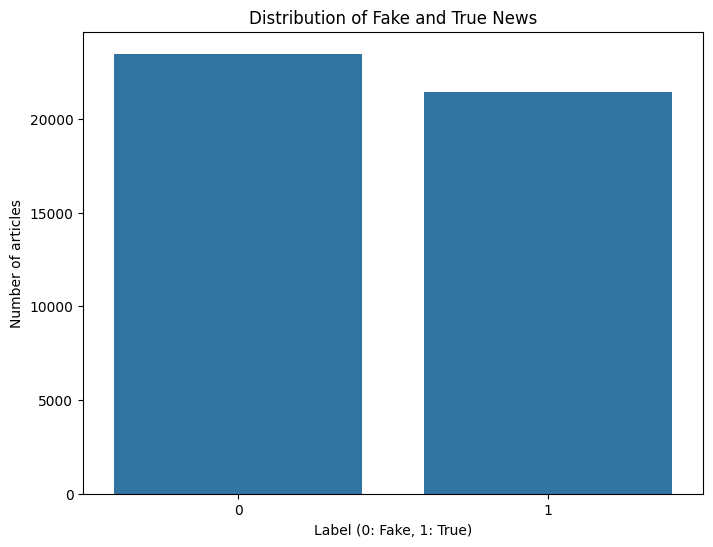

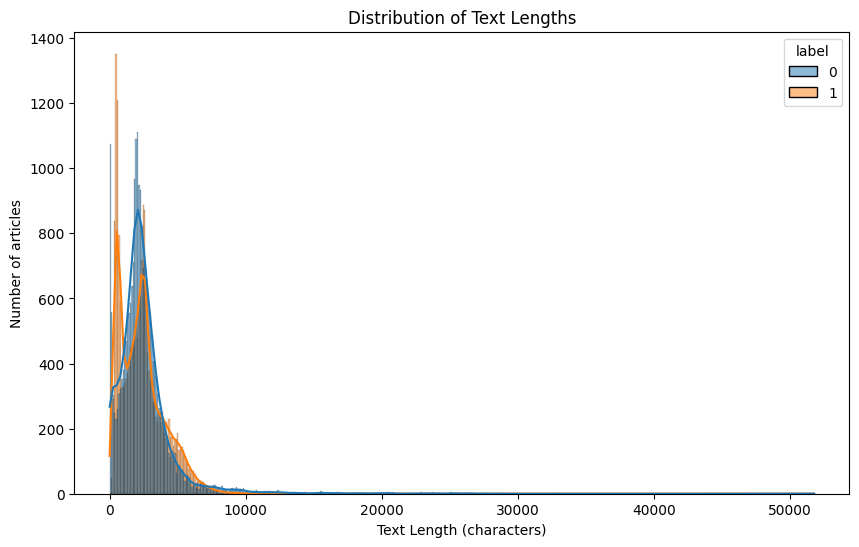

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of labels (fake vs. true)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake and True News')
plt.xlabel('Label (0: Fake, 1: True)')
plt.ylabel('Number of articles')
plt.show()


# Visualize the length distribution of text in fake and true news
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of articles')
plt.show()



In [10]:
df.head()


,title,text,subject,date,label,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346


# The columns with "title", "subject" and "date"  is not required for detecting the fake news, so droping  the columns.


In [11]:
# Drop unnecessary columns
df = df.drop(['title', 'subject', 'date'], axis=1)  # Remove non-text features



In [12]:
df.head() #looking at the dataset to check whether the required columns dropped or not .


,text,label,text_length
0,Donald Trump just couldn t wish all Americans ...,0,2893
1,House Intelligence Committee Chairman Devin Nu...,0,1898
2,"On Friday, it was revealed that former Milwauk...",0,3597
3,"On Christmas day, Donald Trump announced that ...",0,2774
4,Pope Francis used his annual Christmas Day mes...,0,2346


In [13]:
#count of missing values
df.isnull().sum()

,0
text,0
label,0
text_length,0


In [19]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text



df['cleaned_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
# Text preprocessing function
def cleaned_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text



In [22]:
df.head()

,text,label,text_length,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,0,2893,donald trump wish american happy new year leav...
1,House Intelligence Committee Chairman Devin Nu...,0,1898,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",0,3597,friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",0,2774,christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,0,2346,pope francis used annual christmas day message...


In [27]:
# Split into training and testing sets
X_train, X_test, y_train,y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42
)



## TF-IDF   vectorization


In [28]:
# Converting  text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_vec = vectorizer.transform(X_test)  # Transform test data



## Logistic regression model implementataion(hypermeter tuning)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
Linear_Reg = LogisticRegression()
Linear_Reg.fit(X_train_vec, y_train)

LogisticRegression()

In [31]:
pred_lreg = Linear_Reg.predict(X_test_vec)

In [32]:
Linear_Reg.score(X_test_vec, y_test)

0.989086859688196

In [33]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred_lreg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## Decision Tree Classifier


In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_vec, y_train)

DecisionTreeClassifier()

In [35]:
predict_dt = DT.predict(X_test_vec)


DT.score(X_test_vec, y_test)

0.9978841870824053

In [38]:
print (classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# RandomForest


In [39]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=0)

In [40]:
predict_rf = RF.predict(X_test_vec)

RF.score(X_test_vec, y_test)

0.9920935412026726

In [41]:
print (classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## GradientBoostingClassifier


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(X_train_vec, y_train)

GradientBoostingClassifier(random_state=0)

In [43]:
predict_gb = GB.predict(X_test_vec)
GB.score(X_test_vec,y_test)

0.9955456570155902

In [44]:
print(classification_report(y_test, predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Analysis the four models accuracy


In [52]:
print("Linear Regression\n")  # Add the heading before the classification report
print(classification_report(y_test, pred_lreg))
print("\nDecision Tree Classifier\n")
print(classification_report(y_test, predict_dt))
print("\nRandom Forest Classifier\n")
print(classification_report(y_test, predict_rf))
print("\nGradient Boosting Classifier\n")
print (classification_report(y_test, predict_gb))

Linear Regression

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Random Forest Classifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
w

# Testing the model


In [45]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    # Change 'vectorization' to 'vectorizer'
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = Linear_Reg.predict(new_xv_test) # Change 'LR' to Linear_Reg
    pred_DT = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)

    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0]))) #Fixed the indentation error by removing the unnecessary indents

# Model Testing


#type some headline in the result and see whether its a fake news or not


In [48]:
news = str(input('News_headline:'))
manual_testing(news)

News_headline:trump died


LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News
